In [81]:
# Import necessary libraries
import pandas as pd
import numpy as np


In [82]:
import sys
import os
sys.path.append(os.path.abspath('..'))

In [83]:
from scripts.modeling import InsuranceDataModeling

In [84]:
#read the data
data=pd.read_csv('../src/data/insurance_data.csv')

In [85]:
data

,Unnamed: 0,Province,Zipcode,Gender,Total_Claim,Premium
0,0,C,1003,Female,652.740226,898.493109
1,1,A,1003,Female,1159.389368,1040.563548
2,2,C,1003,Male,729.641413,1137.593249
3,3,C,1003,Female,253.524198,764.332164
4,4,A,1001,Male,938.056933,1349.828367
...,...,...,...,...,...,...
995,995,B,1001,Female,1099.492601,1115.364997
996,996,B,1003,Female,877.886857,1250.101777
997,997,C,1002,Female,776.679394,1090.145906
998,998,C,1003,Male,649.706237,1109.161280


In [86]:
# Initialize the analysis class
analysis = InsuranceDataModeling(data)

In [87]:
data = analysis.handle_missing_data()
data = analysis.feature_engineering()
data = analysis.encode_categorical_data()


In [88]:
data

,Unnamed: 0,Gender,Total_Claim,Premium,Premium_to_Claim_Ratio,Province_B,Province_C,Zipcode_1002.0,Zipcode_1003.0
0,0.0,0,652.740226,898.493109,1.374389,False,True,False,True
1,1.0,0,1159.389368,1040.563548,0.896737,False,False,False,True
2,2.0,1,729.641413,1137.593249,1.556979,False,True,False,True
3,3.0,0,253.524198,764.332164,3.002984,False,True,False,True
4,4.0,1,938.056933,1349.828367,1.437430,False,False,False,False
...,...,...,...,...,...,...,...,...,...
995,995.0,0,1099.492601,1115.364997,1.013514,True,False,False,False
996,996.0,0,877.886857,1250.101777,1.422369,True,False,False,True
997,997.0,0,776.679394,1090.145906,1.401793,False,True,True,False
998,998.0,1,649.706237,1109.161280,1.704550,False,True,False,True


In [89]:

# Split the data into train and test sets
X_train, X_test, y_train, y_test = analysis.train_test_split_data()

In [90]:
# Train models and evaluate
results = {}

In [91]:

# Linear Regression
mse_linear, r2_linear = analysis.train_linear_regression(X_train, y_train, X_test, y_test)
results['Linear Regression'] = {'MSE': mse_linear, 'R2': r2_linear}

# Decision Tree
mse_tree, r2_tree = analysis.train_decision_tree(X_train, y_train, X_test, y_test)
results['Decision Tree'] = {'MSE': mse_tree, 'R2': r2_tree}

# Random Forest
# mse_rf, r2_rf, r2 = analysis.train_random_forest(X_train, y_train, X_test, y_test)
rf_model, mse, r2 = analysis.train_random_forest(X_train, y_train, X_test, y_test)

results['Random Forest'] = {'MSE': mse, 'R2': r2}

# XGBoost
mse_xgb, r2_xgb = analysis.train_xgboost(X_train, y_train, X_test, y_test)
results['XGBoost'] = {'MSE': mse_xgb, 'R2': r2_xgb}

In [92]:
# Compare models
model_comparison = analysis.compare_models(results)
print(model_comparison)

                            MSE        R2
Linear Regression  19660.918466  0.476563
Decision Tree      45225.661946 -0.204054
Random Forest      23036.767451  0.386686
XGBoost            24030.973745  0.360217


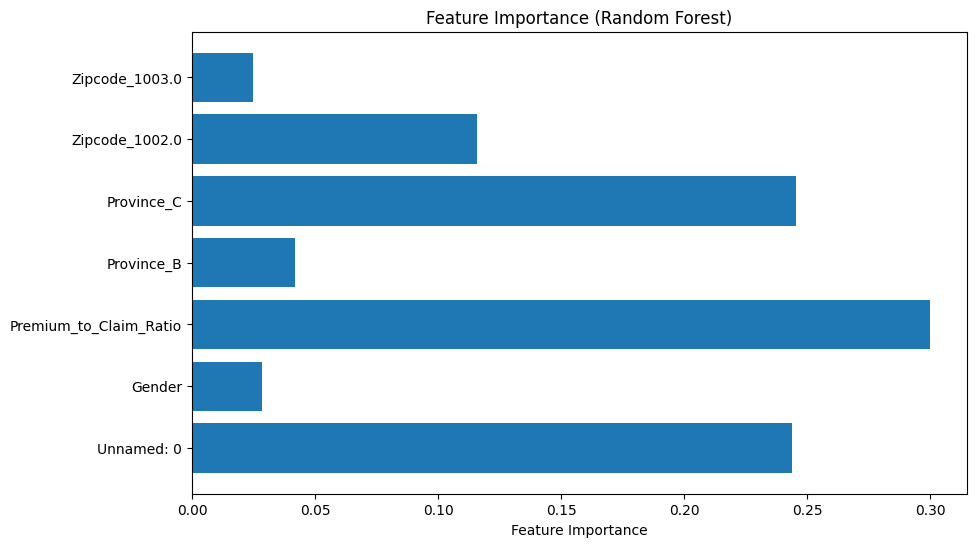

In [93]:
# Feature importance (for Random Forest)
# analysis.feature_importance_analysis(results['Random Forest'], X_train)
analysis.feature_importance_analysis(rf_model, X_train)
